In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [97]:
df = pd.read_csv("salaries_cyber_model.csv")
df.head()

,experience_level,salary,remote_ratio,company_size
0,EN,63000,50,S
1,MI,95000,0,M
2,MI,70000,0,M
3,EX,315000,100,L
4,SE,220000,100,M


In [98]:
df = df.join( pd.get_dummies(df["experience_level"]) )
df.drop("experience_level", axis=1, inplace=True)

df = df.join( pd.get_dummies(df["remote_ratio"], prefix="remote_") )
df.drop("remote_ratio", axis=1, inplace=True)

df = df.join( pd.get_dummies(df["company_size"], prefix="company_size_") )
df.drop("company_size", axis=1, inplace=True)

df.head()

,salary,EN,EX,MI,SE,remote__0,remote__50,remote__100,company_size__L,company_size__M,company_size__S
0,63000,1,0,0,0,0,1,0,0,0,1
1,95000,0,0,1,0,1,0,0,0,1,0
2,70000,0,0,1,0,1,0,0,0,1,0
3,315000,0,1,0,0,0,0,1,1,0,0
4,220000,0,0,0,1,0,0,1,0,1,0


# Test and Training Split

In [99]:
y = df.loc[:, "salary"]
y

0       63000
1       95000
2       70000
3      315000
4      220000
        ...  
867    170000
868    135000
869    100000
870    126000
871     66310
Name: salary, Length: 872, dtype: int64

In [100]:
X = df.drop("salary", axis=1)
X.head()

,EN,EX,MI,SE,remote__0,remote__50,remote__100,company_size__L,company_size__M,company_size__S
0,1,0,0,0,0,1,0,0,0,1
1,0,0,1,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,1,0
3,0,1,0,0,0,0,1,1,0,0
4,0,0,0,1,0,0,1,0,1,0


In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, 
)

# Scaling

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
y_train = y_train.values.reshape(-1, 1)

In [104]:
scaler = StandardScaler()
y_train = scaler.fit_transform( y_train )
y_train

array([[-6.29004682e-01],
       [ 8.32970525e-01],
       [ 3.72525281e-01],
       [ 2.63569655e-01],
       [ 2.94348080e-01],
       [ 3.71294144e-01],
       [ 2.17402017e-01],
       [-9.03822372e-02],
       [-9.36788936e-01],
       [ 1.98934962e-01],
       [ 2.02012804e-01],
       [-5.19741272e-01],
       [ 7.56024461e-01],
       [ 1.98934962e-01],
       [-4.90501767e-01],
       [-2.44274364e-01],
       [ 3.25126506e-01],
       [-1.24457319e+00],
       [ 1.23309006e+00],
       [ 2.17402017e-01],
       [-9.38327857e-01],
       [-5.82837044e-01],
       [ 3.71294144e-01],
       [-9.03822372e-02],
       [-7.82896809e-01],
       [-1.51939088e-01],
       [-1.16762713e+00],
       [ 6.79078398e-01],
       [-1.96443439e+00],
       [ 7.88991025e-02],
       [ 5.25186271e-01],
       [ 3.72525281e-01],
       [-2.71974947e-01],
       [-4.59723342e-01],
       [-2.73513868e-01],
       [-3.98166491e-01],
       [-3.67388066e-01],
       [-6.90561533e-01],
       [ 9.8

In [105]:
y_test = scaler.transform( y_test.values.reshape(-1, 1) )

# Test and evaluation split

In [106]:
# Creating evaluation data from 20% of the original data

X_train, X_eval, y_train, y_eval = train_test_split(
    X_train, y_train, test_size=0.25
)

# Modeling

## Linear Regression as Baseline

In [107]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_eval, y_eval)

0.34219129802579484

In [108]:
from sklearn.metrics import mean_squared_error 

y_pred = reg.predict(X_eval)
mean_squared_error(y_eval, y_pred, squared=True)

0.8037744244197599

## Polynomial Features

In [109]:
from sklearn.preprocessing import PolynomialFeatures

for degree in range(2, 14):
    # Fit and transform data
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X_train)

    X_eval_transformed = poly_features.transform(X_eval)

    # Fit model on transformed data
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_train)

    # Evaluate model
    y_pred = lin_reg.predict(X_eval_transformed)
    mse = mean_squared_error(y_eval, y_pred, squared=True)

    print(f"Degree of Polynom: {degree}, MSE: {mse}")

Degree of Polynom: 2, MSE: 0.825907941882245
Degree of Polynom: 3, MSE: 2.166287610561258e+23
Degree of Polynom: 4, MSE: 2.3948083396191666e+24
Degree of Polynom: 5, MSE: 2.64534188276864e+23
Degree of Polynom: 6, MSE: 1.4426455625207157e+24
Degree of Polynom: 7, MSE: 4.577342035018824e+21
Degree of Polynom: 8, MSE: 2.3647816639062354e+23
Degree of Polynom: 9, MSE: 5.816900722437148e+21
Degree of Polynom: 10, MSE: 2.2355088455475107e+24
Degree of Polynom: 11, MSE: 7.742167578179805e+24
Degree of Polynom: 12, MSE: 1.2678826478775782e+24
Degree of Polynom: 13, MSE: 7.176025821858936e+22


## Ridge Regression

In [110]:
from sklearn.linear_model import Ridge, RidgeCV

#ridge_reg = Ridge( alpha=0.1, solver="cholesky" )
#ridge_reg.fit(X_train, y_train)
ridge_reg = RidgeCV(alphas=(0.0001, 0.001, 0.01, 0.1, 1, 2, 3)).fit(X_train, y_train)

y_pred = ridge_reg.predict( X_eval )
mean_squared_error(y_eval, y_pred, squared=True)

0.8068706867760388

In [111]:
ridge_reg.alpha_

1.0

In [112]:
ridge_reg.best_score_

-0.6035605016572188

## Lasso Regression

In [113]:
from sklearn.linear_model import LassoCV

reg = LassoCV(cv=5).fit(X_train, y_train)

y_pred = reg.predict( X_eval )
mean_squared_error(y_eval, y_pred, squared=True)

e:\Programme\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8076564006281298

## Deep Learning

In [114]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, input_dim=10, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1)
])

model.compile(loss="mean_absolute_error", optimizer=Adam(learning_rate=0.001), metrics="RootMeanSquaredError")

history = model.fit(
    x=X_train,
    y=y_train,
    epochs=20,
    validation_data=(X_eval, y_eval),
)

Epoch 1/20
17/17 [==============================] - 2s 34ms/step - loss: 0.6572 - root_mean_squared_error: 0.9311 - val_loss: 0.6207 - val_root_mean_squared_error: 1.0178
Epoch 2/20
17/17 [==============================] - 0s 3ms/step - loss: 0.5710 - root_mean_squared_error: 0.8623 - val_loss: 0.5452 - val_root_mean_squared_error: 0.9597
Epoch 3/20
17/17 [==============================] - 0s 3ms/step - loss: 0.5428 - root_mean_squared_error: 0.8124 - val_loss: 0.5548 - val_root_mean_squared_error: 0.9379
Epoch 4/20
17/17 [==============================] - 0s 3ms/step - loss: 0.5281 - root_mean_squared_error: 0.7986 - val_loss: 0.5418 - val_root_mean_squared_error: 0.9278
Epoch 5/20
17/17 [==============================] - 0s 3ms/step - loss: 0.5195 - root_mean_squared_error: 0.7824 - val_loss: 0.5378 - val_root_mean_squared_error: 0.9157
Epoch 6/20
17/17 [==============================] - 0s 3ms/step - loss: 0.5239 - root_mean_squared_error: 0.7760 - val_loss: 0.5376 - val_root_mean_s

In [115]:
X_train

,EN,EX,MI,SE,remote__0,remote__50,remote__100,company_size__L,company_size__M,company_size__S
752,0,0,0,1,1,0,0,1,0,0
749,1,0,0,0,0,0,1,1,0,0
840,0,1,0,0,0,0,1,1,0,0
112,0,1,0,0,0,0,1,0,1,0
331,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
238,0,0,1,0,1,0,0,0,1,0
208,0,0,0,1,0,0,1,0,1,0
330,1,0,0,0,1,0,0,1,0,0
782,0,0,0,1,0,0,1,0,1,0


In [116]:
# Entry level, no remote work, large company
scaler.inverse_transform( model.predict([[1, 0, 0, 0, 1, 0, 0, 1, 0, 0]]) )

1/1 [==============================] - 0s 111ms/step


array([[76586.93]], dtype=float32)

In [117]:
# Entry level, no remote work, medium company
scaler.inverse_transform( model.predict([[1, 0, 0, 0, 1, 0, 0, 0, 1, 0]]) )

1/1 [==============================] - 0s 39ms/step


array([[70548.87]], dtype=float32)

In [118]:
!pip install -q -U keras-tuner

In [119]:
import keras_tuner as kt

def model_builder(hp):
    model = Sequential([
        Dense(64, input_dim=10, activation="relu"),
        Dense(64, activation="relu"),
        Dense(32, activation="relu"),
        Dense(1)
    ])

    hp_learning_rate = hp.Choice("learning_rate", values=[0.1, 0.01, 0.001, 0.00001])
    model.compile(loss="mean_absolute_error", optimizer=Adam(learning_rate=0.001), metrics="RootMeanSquaredError")

    return model


tuner = kt.Hyperband(
    model_builder,
    objective=kt.Objective("val_root_mean_squared_error", direction="min"),
    max_epochs=30,
    factor=3,
    directory="hp_tuning",
    project_name="cyber_salary_estimator"
)

tuner.search(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_eval, y_eval),
)

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
best_learning_rate = best_hps["learning_rate"]

print(f"Best learning rate: {best_learning_rate}")

INFO:tensorflow:Reloading Tuner from hp_tuning\cyber_salary_estimator\tuner0.json
INFO:tensorflow:Oracle triggered exit
Best learning rate: 0.01


In [120]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_eval, y_eval))

val_rmse_per_epoch = history.history["val_root_mean_squared_error"]
best_epoch = val_rmse_per_epoch.index(min(val_rmse_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/30
17/17 [==============================] - 0s 10ms/step - loss: 0.6573 - root_mean_squared_error: 0.9407 - val_loss: 0.6190 - val_root_mean_squared_error: 1.0117
Epoch 2/30
17/17 [==============================] - 0s 3ms/step - loss: 0.5766 - root_mean_squared_error: 0.8651 - val_loss: 0.5512 - val_root_mean_squared_error: 0.9618
Epoch 3/30
17/17 [==============================] - 0s 3ms/step - loss: 0.5455 - root_mean_squared_error: 0.8189 - val_loss: 0.5596 - val_root_mean_squared_error: 0.9398
Epoch 4/30
17/17 [==============================] - 0s 3ms/step - loss: 0.5318 - root_mean_squared_error: 0.8059 - val_loss: 0.5366 - val_root_mean_squared_error: 0.9330
Epoch 5/30
17/17 [==============================] - 0s 3ms/step - loss: 0.5297 - root_mean_squared_error: 0.7997 - val_loss: 0.5362 - val_root_mean_squared_error: 0.9293
Epoch 6/30
17/17 [==============================] - 0s 4ms/step - loss: 0.5263 - root_mean_squared_error: 0.7997 - val_loss: 0.5657 - val_root_mean_s

In [121]:
hypermodel = tuner.hypermodel.build(best_hps)
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_data=(X_eval, y_eval))

Epoch 1/11
17/17 [==============================] - 0s 11ms/step - loss: 0.6559 - root_mean_squared_error: 0.9549 - val_loss: 0.6041 - val_root_mean_squared_error: 1.0255
Epoch 2/11
17/17 [==============================] - 0s 3ms/step - loss: 0.5852 - root_mean_squared_error: 0.8883 - val_loss: 0.5572 - val_root_mean_squared_error: 0.9814
Epoch 3/11
17/17 [==============================] - 0s 3ms/step - loss: 0.5560 - root_mean_squared_error: 0.8529 - val_loss: 0.5478 - val_root_mean_squared_error: 0.9660
Epoch 4/11
17/17 [==============================] - 0s 3ms/step - loss: 0.5417 - root_mean_squared_error: 0.8332 - val_loss: 0.5372 - val_root_mean_squared_error: 0.9533
Epoch 5/11
17/17 [==============================] - 0s 3ms/step - loss: 0.5354 - root_mean_squared_error: 0.8186 - val_loss: 0.5366 - val_root_mean_squared_error: 0.9400
Epoch 6/11
17/17 [==============================] - 0s 3ms/step - loss: 0.5251 - root_mean_squared_error: 0.8060 - val_loss: 0.5333 - val_root_mean_s

In [122]:
eval_result = hypermodel.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5407 - root_mean_squared_error: 0.7213


In [123]:
print("[test loss, test accuracy]:", eval_result)

[test loss, test accuracy]: [0.5406957864761353, 0.721299946308136]


In [124]:
hypermodel.save("./models/hypermodel")

INFO:tensorflow:Assets written to: ./models/hypermodel\assets


# Modeling with one feature

In [126]:
df2 = pd.read_csv("salaries_cyber_model.csv")

In [127]:
df2.head()

,experience_level,salary,remote_ratio,company_size
0,EN,63000,50,S
1,MI,95000,0,M
2,MI,70000,0,M
3,EX,315000,100,L
4,SE,220000,100,M


<AxesSubplot: xlabel='experience_level', ylabel='salary'>

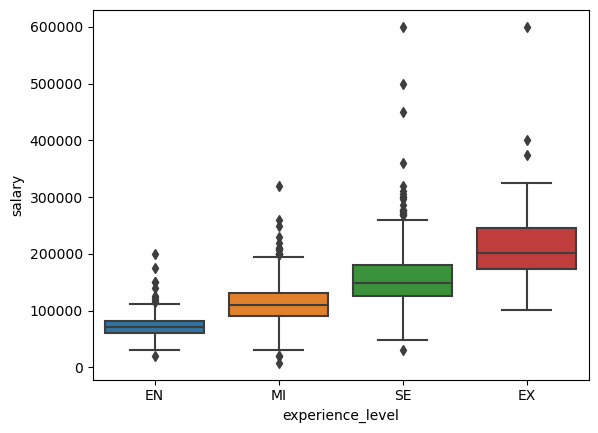

In [129]:
sns.boxplot(
    x = df2["experience_level"],
    y = df2["salary"],
    order=["EN", "MI", "SE", "EX"]
)

In [132]:
quantile25 = df2.groupby("experience_level").quantile(.25)
quantile75 = df2.groupby("experience_level").quantile(.75)

C:\Users\fahri\AppData\Local\Temp\ipykernel_6760\2219739874.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  quantile25 = df2.groupby("experience_level").quantile(.25)
C:\Users\fahri\AppData\Local\Temp\ipykernel_6760\2219739874.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  quantile75 = df2.groupby("experience_level").quantile(.75)


In [143]:
quantile25

,salary,remote_ratio
experience_level,,
EN,60006.0,50.0
EX,172875.0,87.5
MI,89998.0,0.0
SE,125000.0,100.0


In [142]:
quantile25.loc[:, "salary"]["EN"]

60006.0